Import packacges.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('../../final_result_impl_tempmatch_unroll.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

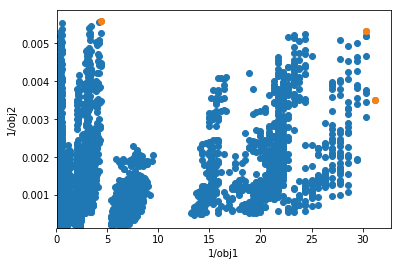

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0


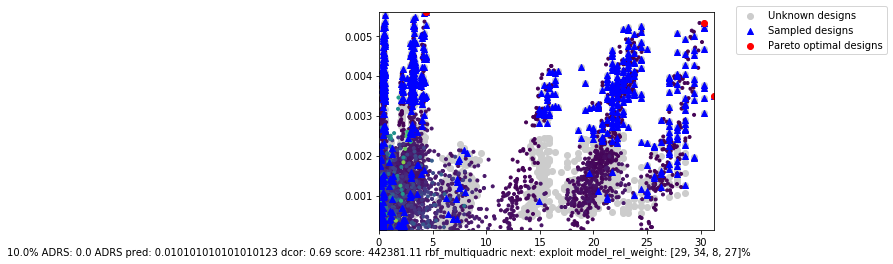

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.1),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([5092, 3251, 4192, 6662, 6297, 3019, 2962, 2947,    8,    0,    1,
         15,  232,    4,  114,    2, 2877,  236,  294,  993, 4089, 4154,
         28,   69, 1008,   17,   56, 3905, 3874,  115,  233,  982,   70,
        248,   57,    5,   61,  988,   85, 1005, 1706, 3872,   29, 4568,
        979,  980,  297,   73, 2688,  994, 6491,  983,   18,   74, 2003,
       2692,  295, 1002, 4836, 6551, 1961, 4833, 1987, 5467, 1029, 4790,
       1757, 4795, 1030, 2736, 2169,   16, 2060, 2018,  981, 6128, 2134,
       1045, 2144, 6432, 6440, 6102,  100, 1090, 1964, 6360, 1014, 1033,
       6246, 1031, 1046,   77,  160,  355, 1088,   45, 2070, 6124, 6183,
       1965, 1079,   32, 1962,  103,  104,   46, 1963,   71,   88,   43,
       6838,  118, 6877, 6456,   12, 1028, 6515, 2054, 6636,   49, 1061,
       6343, 6138, 2039, 2182, 1049, 6586,  309,  240, 2172, 6873,  237,
       6037,    6, 4936,  111, 1015, 6065,   33, 2439, 3924,   89, 1833,
       1016, 6830, 3921, 1754, 4788, 2664, 6038, 65